In [2]:
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('./gbapy/')

# Load the GBA_model class
from GbaModel import *

In [ ]:
create_gba_model(model_folder = "./csv_models/D", gba_path="./examples", save_LP = False, save_optimums = True)


In [3]:
model = load_gba_model("./examples/D.gba")


### EGD mu, v , c , p in one plot

### PLOT EGD for condition 1, p,v,c

In [4]:
model.clear_all_trajectories()

In [7]:
model.EGD_tracker

,label,condition,t,mu,fixed,rxn1.v,rxn2.v,rxn3.v,rxn4.v,Ribosome.v
0,1,1,0.0,0.904076,0,195.804775,111.581057,0.0,235.150162,284.331895
1,1,1,1.0,0.984931,1,212.610681,122.265803,0.46178,256.698254,309.219995
2,1,1,2.0,1.066069,2,229.01661,133.446836,0.475355,278.231376,333.759847
3,1,1,3.0,1.104515,3,236.643125,138.891895,0.483595,288.74863,345.274422
4,1,1,4.0,1.128447,4,241.347143,142.324761,1.053518,295.579869,352.051396
...,...,...,...,...,...,...,...,...,...,...
841,1,1,841.0,2.167319,841,435.194594,301.693726,0.470262,503.526898,511.484272
842,1,1,842.0,2.166851,842,434.091977,302.637286,0.971965,502.929315,511.487244
843,1,1,843.0,2.166906,843,433.805975,302.941899,2.269699,501.973921,510.820706
844,1,1,844.0,2.167298,844,434.349201,302.532232,2.215415,502.069037,510.812916


> Condition 1: MAXITER reached
> EGD: maximum iterations reached (condition=1,	mu=1.27637,	nb iterations=1000,	nb fixed=19).


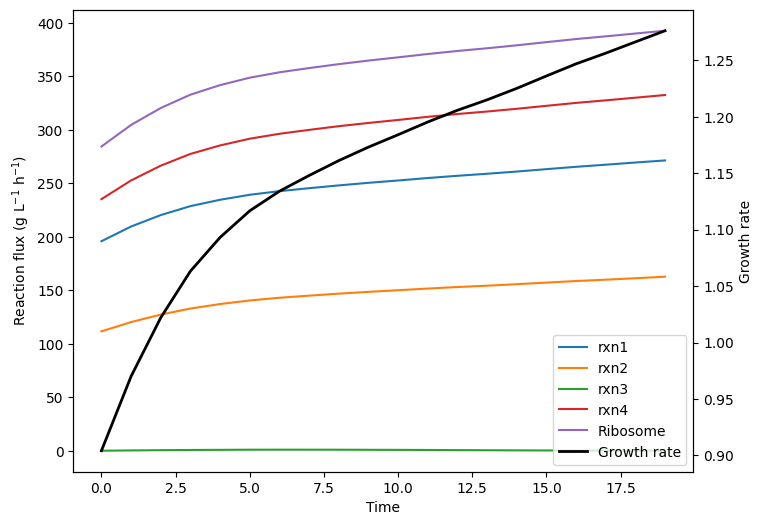

In [10]:
import matplotlib.pyplot as plt

# Clear previous trajectories and set up model
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.EGD_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.0001, N_e = 100, track = True, savedValues = ['v'], label = 1)

# Extract data
DfluxCon1 = model.EGD_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time = model.EGD_tracker["t"]
growthrate = model.EGD_tracker["mu"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot reaction fluxes on the primary y-axis (left side)
for column in DfluxCon1:
    label = column.replace('.v', '')  # Remove ".v" from labels
    ax1.plot(time, DfluxCon1[column], label=label)

# Set labels for primary axis (reaction fluxes)
ax1.set_xlabel('Time')
ax1.set_ylabel(r'Reaction flux (g L$^{-1}$ h$^{-1}$)')
#ax1.set_title('Reaction fluxes and Growth rate over time')

# Create a secondary y-axis for growth rate
ax2 = ax1.twinx()
ax2.plot(time, growthrate, label='Growth rate', color='black', linewidth=2)  # Red for growth rate

# Set label for secondary axis (growth rate)
ax2.set_ylabel('Growth rate', color='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

#save figure before showing
plt.savefig("EGD_100_reaction_flux_growthrate_plot.png", dpi=300)
# Display the plot
plt.show()




### EGD P vs Time

> Condition 1: MAXITER reached
> EGD: maximum iterations reached (condition=1,	mu=2.17879,	nb iterations=1000,	nb fixed=789).


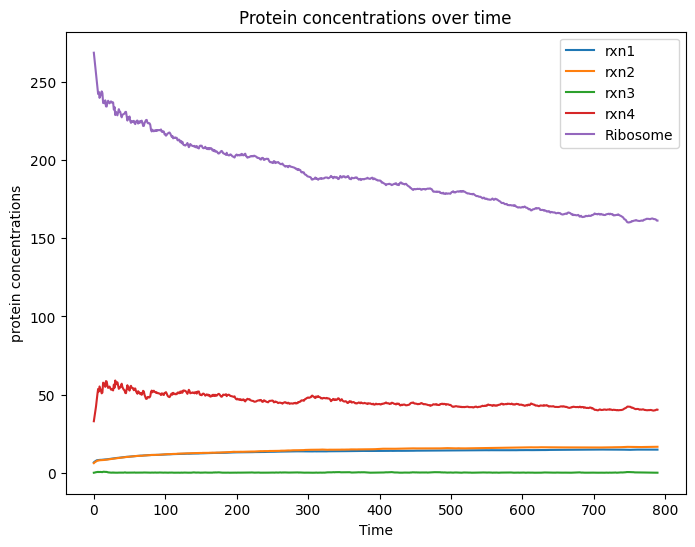

In [10]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.EGD_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.0001, N_e = 200, track = True, savedValues = ['p'], label = 1)

# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.EGD_tracker[["rxn1.p", "rxn2.p", "rxn3.p", "rxn4.p", "Ribosome.p"]]
time = model.EGD_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.p', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('protein concentrations')
plt.title('Protein concentrations over time')

# Show a legend
plt.legend()

# Display the plot
plt.show()

### EGD C vs Time

> Condition 1: MAXITER reached
> EGD: maximum iterations reached (condition=1,	mu=2.17267,	nb iterations=1000,	nb fixed=793).
[ 14.74753528  47.85212704  41.59381572 235.80652196]


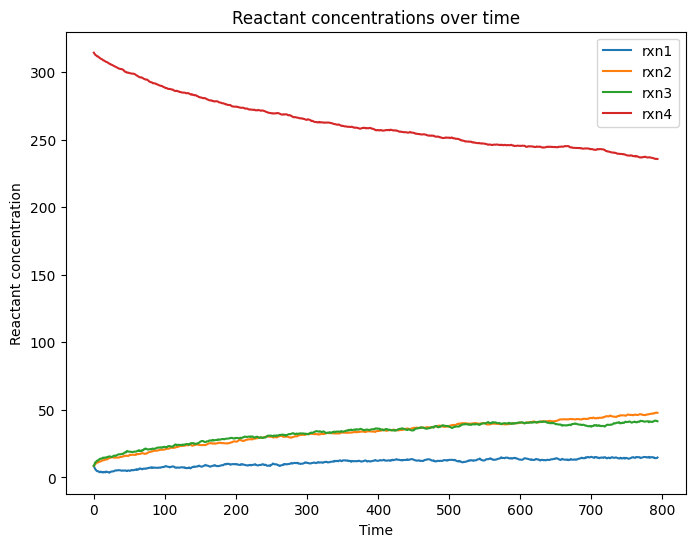

In [11]:
import matplotlib.pyplot as plt
model.clear_all_trajectories()
model.set_f0(model.LP_solution)
model.EGD_simulation(condition="1", max_time = 1000, max_iter = 1000, sigma = 0.0001, N_e = 200, track = True, savedValues = ['c'], label = 1)
print(model.c)
# Example data (assuming similar structure for your DataFrame)
DfluxCon1 = model.EGD_tracker[["rxn1.c", "rxn2.c", "rxn3.c", "rxn4.c"]]
time = model.EGD_tracker["t"]  # 'time' as a single series, not a DataFrame

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each reaction flux against time
for column in DfluxCon1:
    label = column.replace('.c', '')
    plt.plot(time, DfluxCon1[column], label=label)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Reactant concentration')
plt.title('Reactant concentrations over time')

# Show a legend
plt.legend()

# Display the plot
plt.show()